In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [37]:
data = pd.read_csv('drug200.csv')
data.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [39]:
print('Blood Pressure : ', data.BP.unique())
print('Cholesterol    : ', data.Cholesterol.unique())
print('Drugs          : ', data.Drug.unique())

Blood Pressure :  ['HIGH' 'LOW' 'NORMAL']
Cholesterol    :  ['HIGH' 'NORMAL']
Drugs          :  ['drugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [40]:
data.duplicated().sum()

0

In [41]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

<AxesSubplot:xlabel='Drug', ylabel='count'>

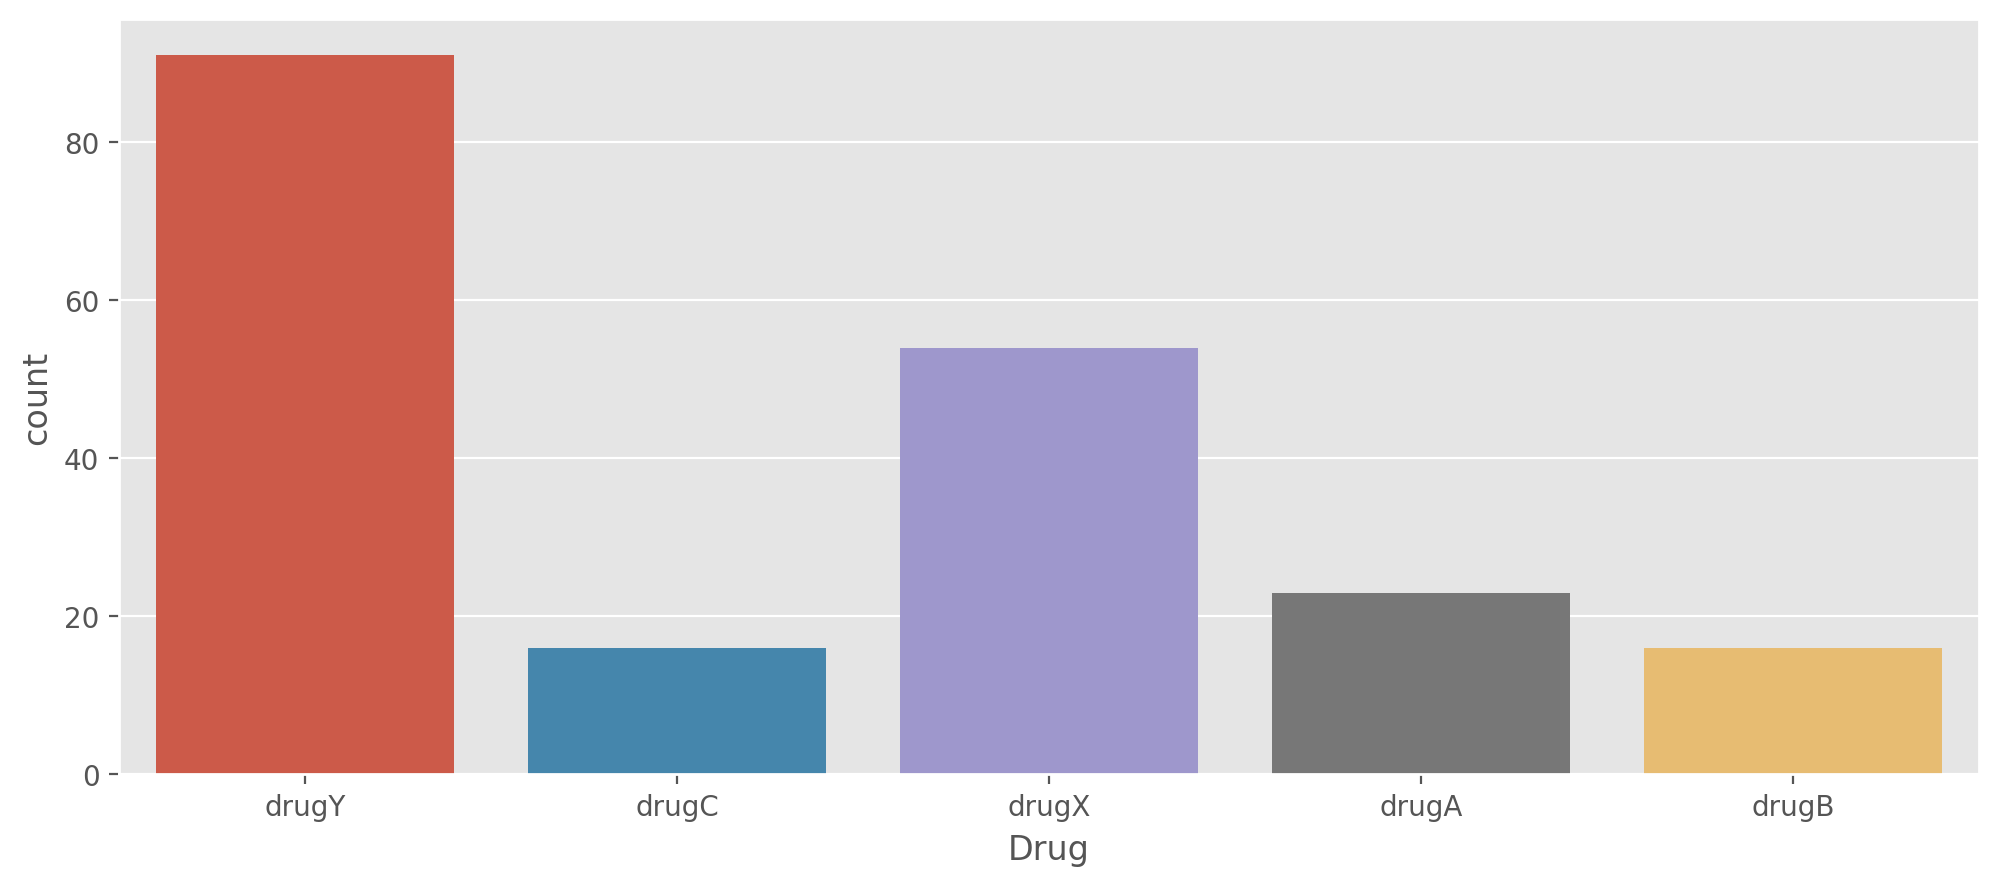

In [42]:
plt.figure(figsize = (12,5), dpi =200)
sns.countplot('Drug', data = data)

<AxesSubplot:xlabel='Drug', ylabel='count'>

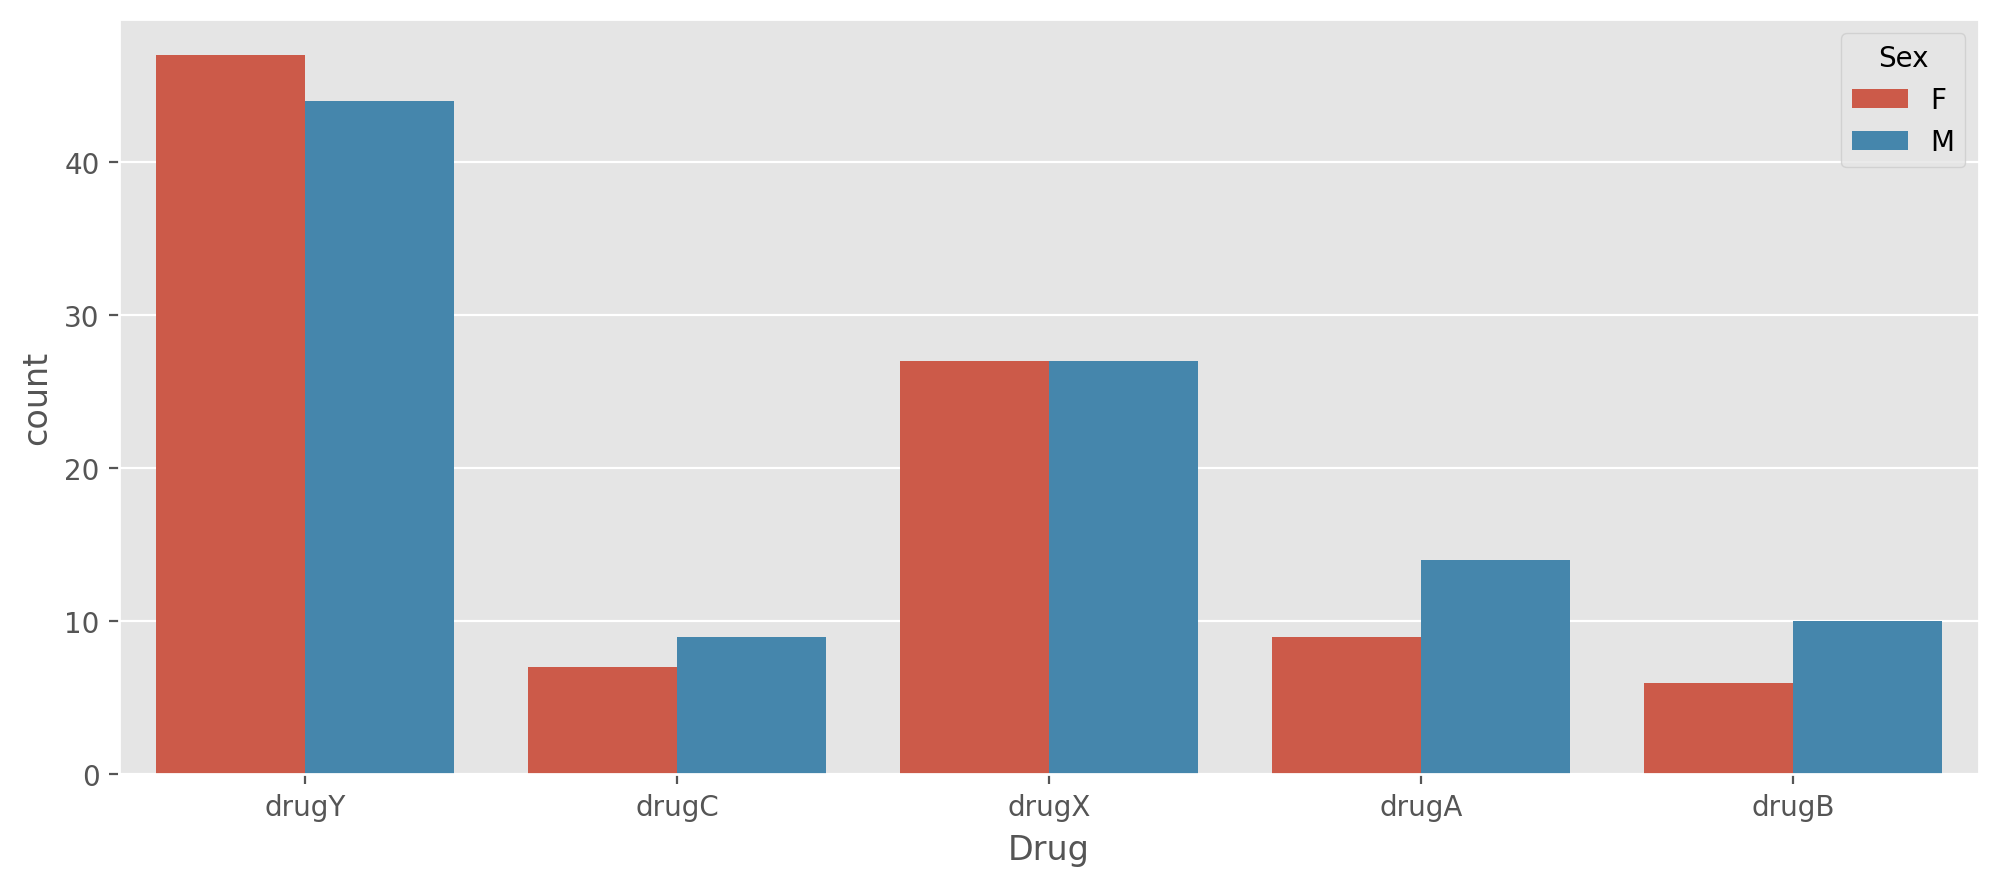

In [43]:
plt.figure(figsize = (12,5), dpi =200)
sns.countplot('Drug', hue =  'Sex', data = data)

<AxesSubplot:xlabel='Drug', ylabel='count'>

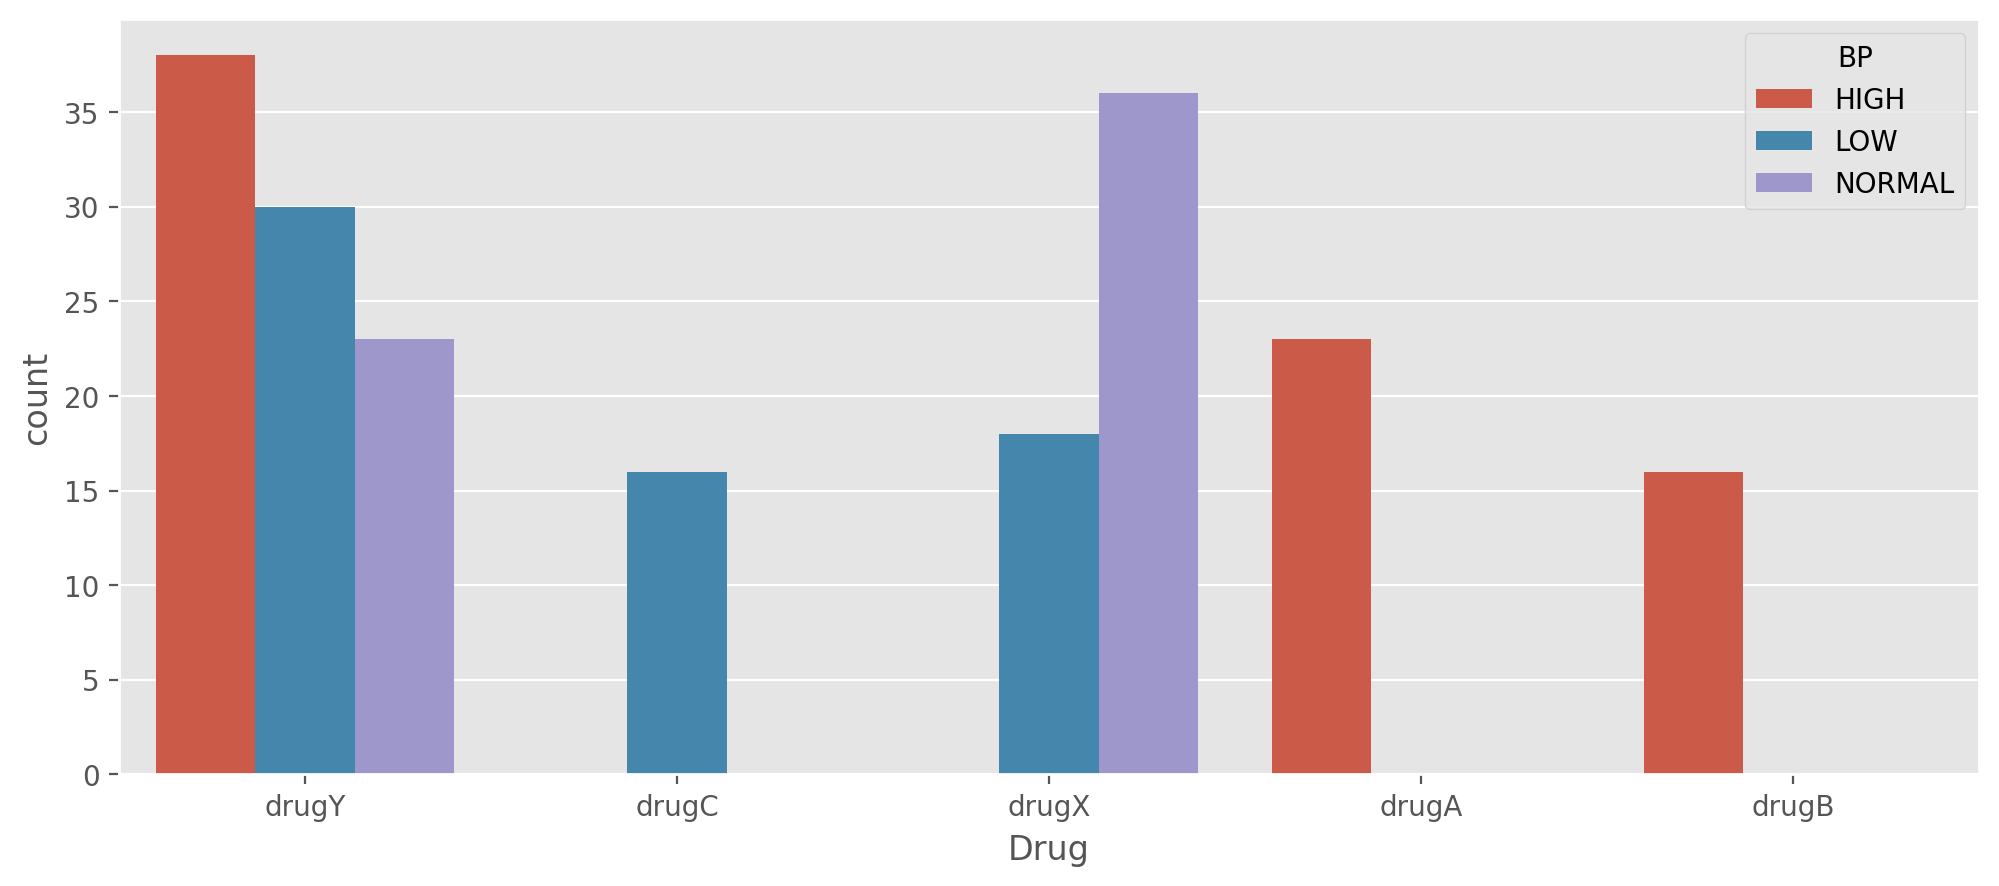

In [44]:
plt.figure(figsize = (12,5), dpi =200)
sns.countplot('Drug', hue =  'BP', data = data)

<AxesSubplot:xlabel='Drug', ylabel='count'>

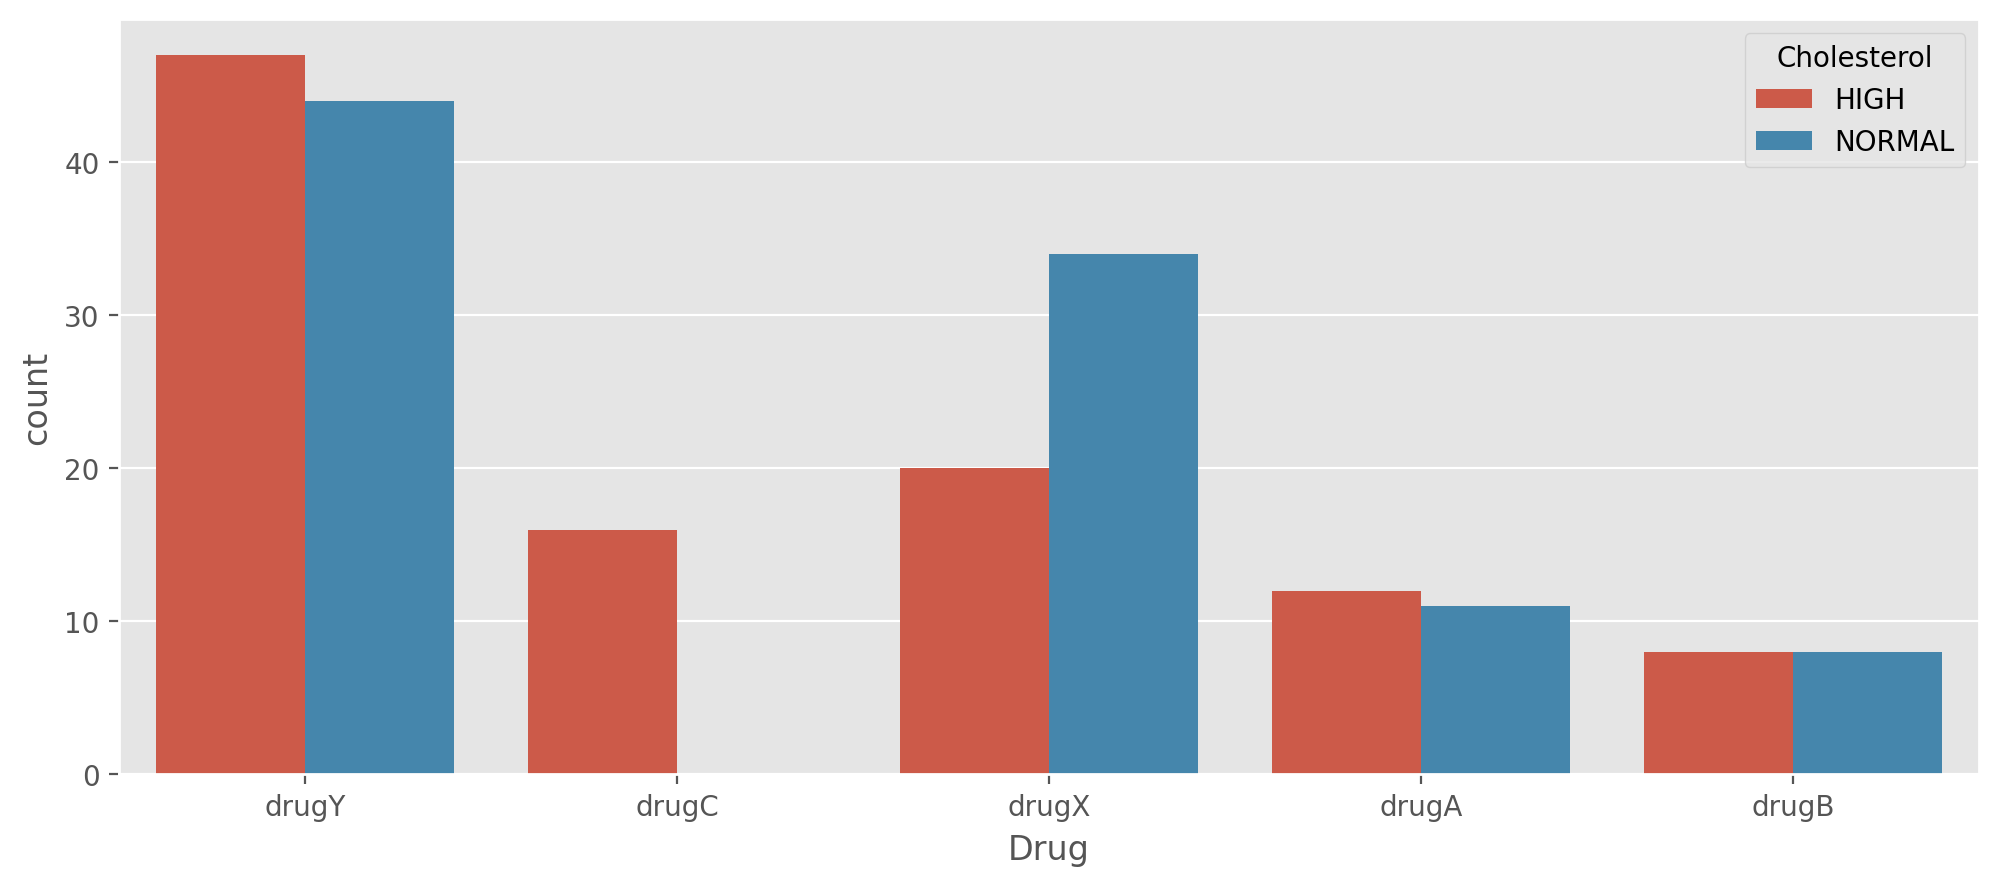

In [45]:
plt.figure(figsize = (12,5), dpi =200)
sns.countplot('Drug', hue =  'Cholesterol', data = data)

<AxesSubplot:xlabel='Drug', ylabel='Age'>

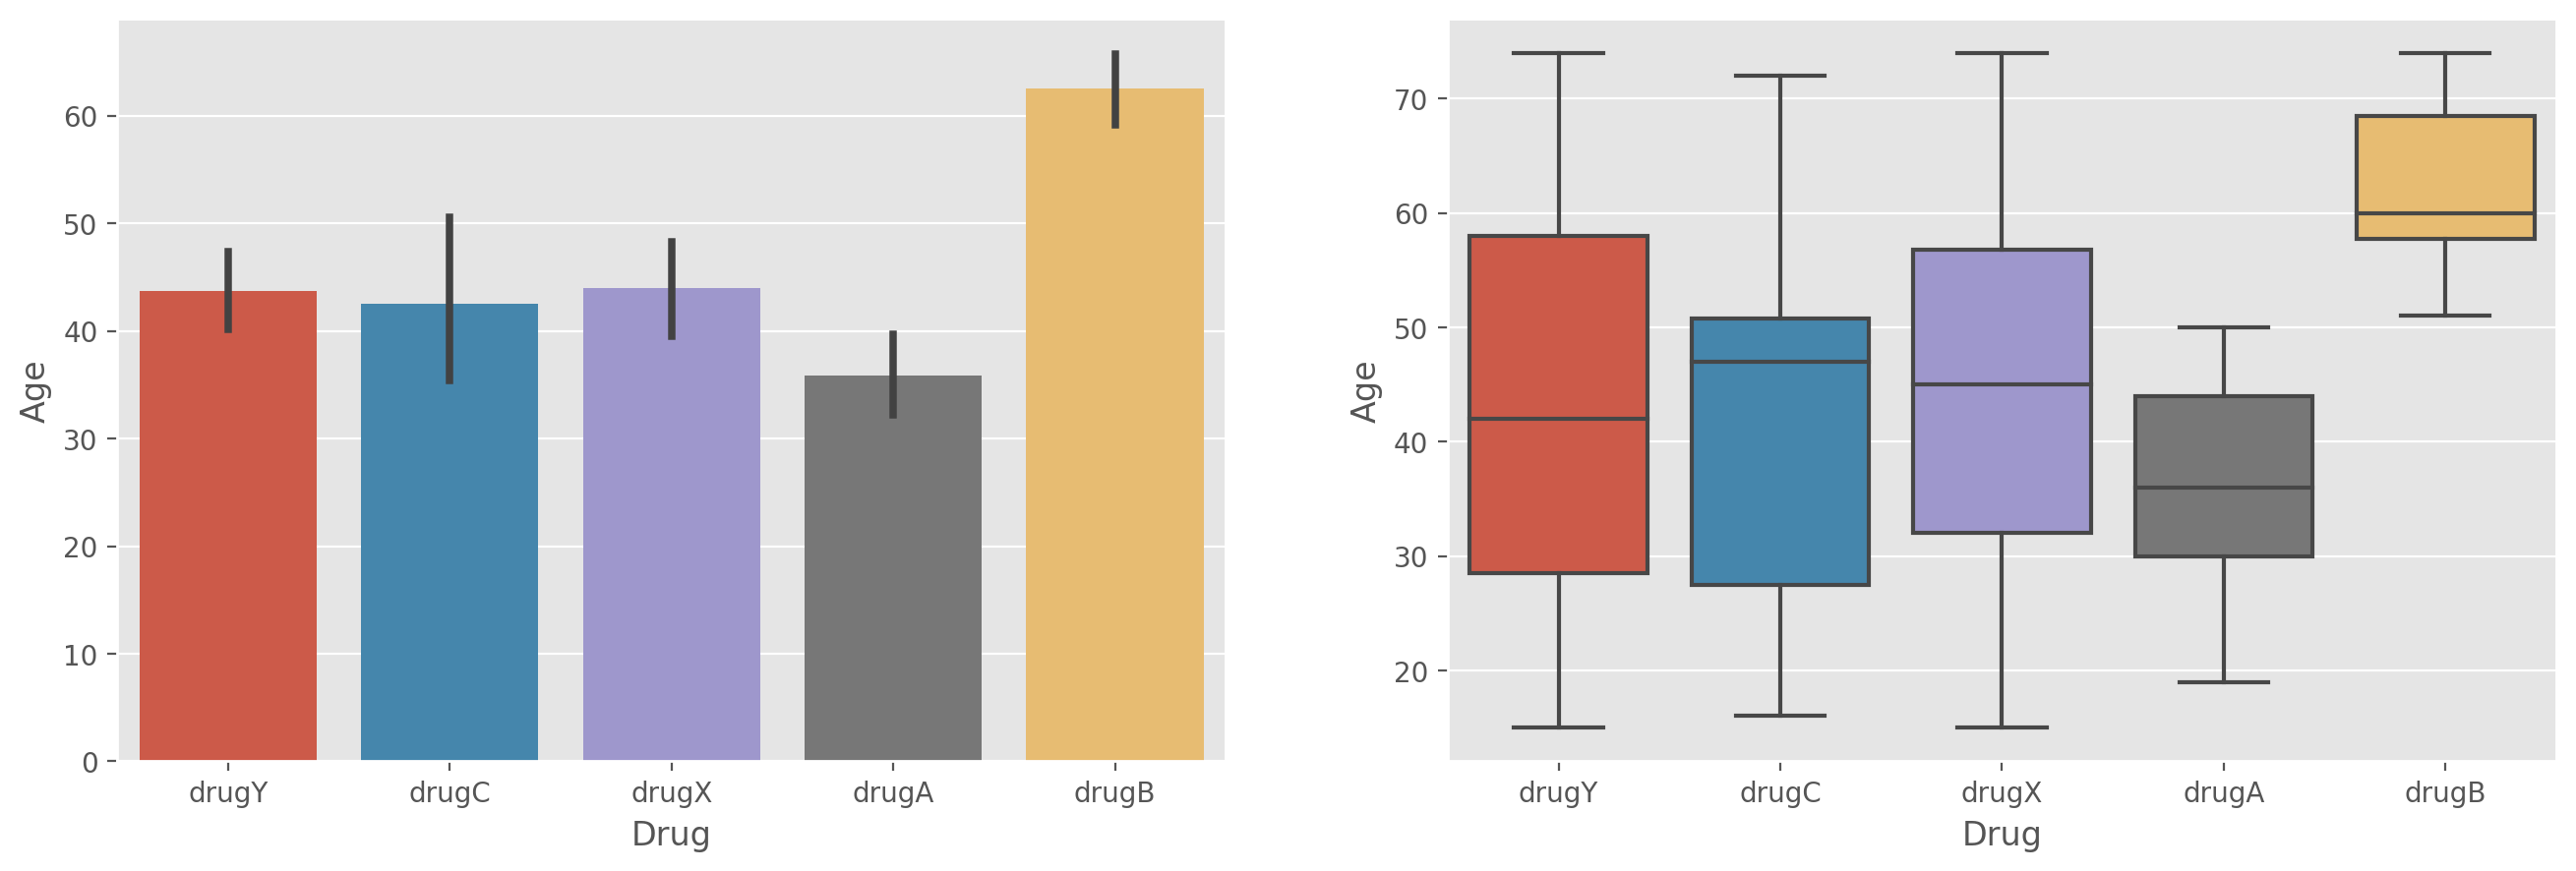

In [46]:
plt.figure(figsize = (16,5), dpi =200)
plt.subplot(1,2,1)
sns.barplot('Drug', 'Age', data = data)
plt.subplot(1,2,2)
sns.boxplot('Drug', 'Age', data = data)

<AxesSubplot:xlabel='Drug', ylabel='Na_to_K'>

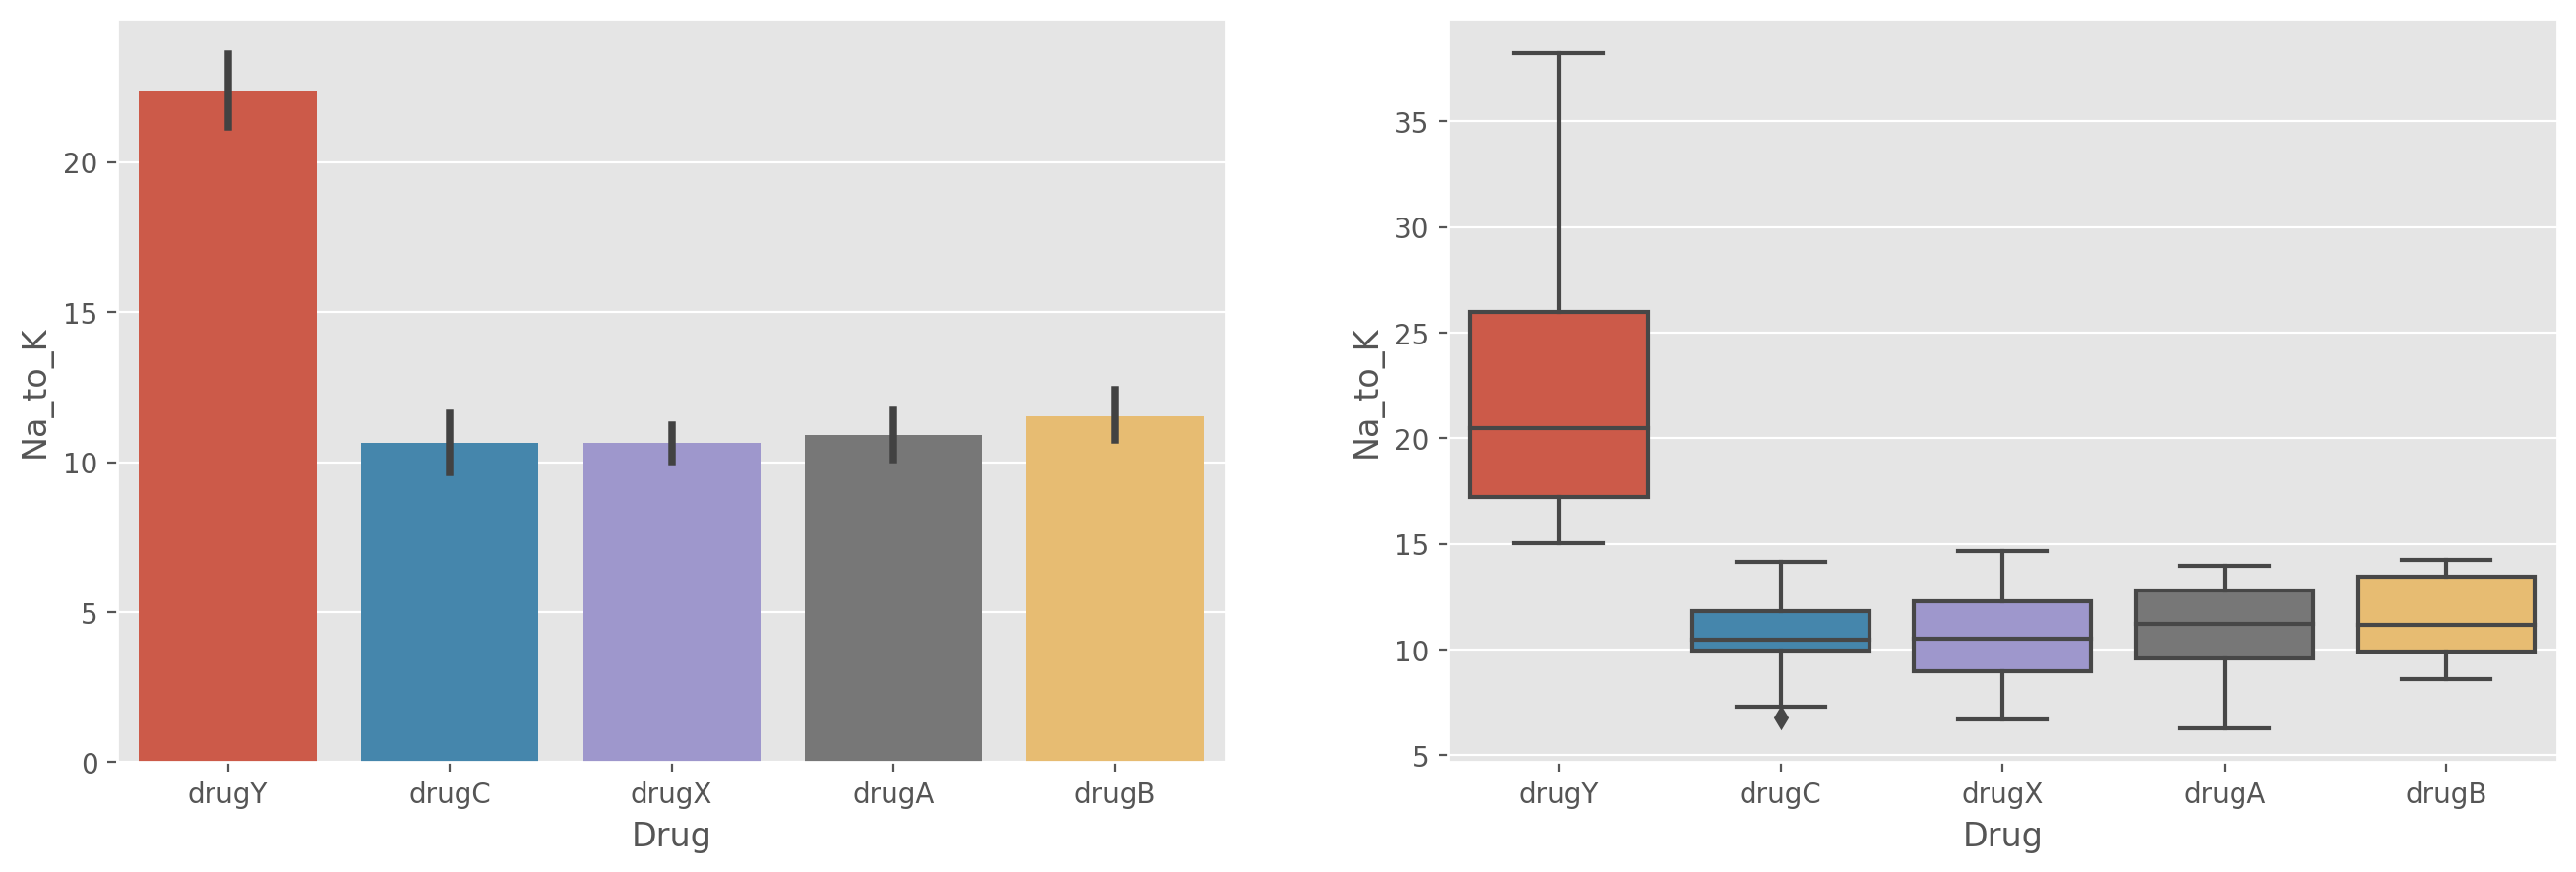

In [47]:
plt.figure(figsize = (16,5), dpi =200)
plt.subplot(1,2,1)
sns.barplot('Drug', 'Na_to_K', data = data)
plt.subplot(1,2,2)
sns.boxplot('Drug', 'Na_to_K', data = data)

In [48]:
X = data.drop('Drug', axis =1)
Y = data[['Drug']]

print('Independent Feature Set Shape : ', X.shape)
print('Dependent Feature Set Shape   : ', Y.shape)

Independent Feature Set Shape :  (200, 5)
Dependent Feature Set Shape   :  (200, 1)


In [49]:
X.BP = X.BP.map({'LOW' : 0, 'NORMAL' : 1, 'HIGH' : 2})
X.Cholesterol = X.Cholesterol.map({'NORMAL' : 0, 'HIGH' : 1})
X.Sex = X.Sex.map({'M' : 0, 'F' : 1})

X.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,1,2,1,25.355
1,47,0,0,1,13.093
2,47,0,0,1,10.114
3,28,1,1,1,7.798
4,61,1,0,1,18.043
5,22,1,1,1,8.607
6,49,1,1,1,16.275
7,41,0,0,1,11.037
8,60,0,1,1,15.171
9,43,0,0,0,19.368


In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [60]:
print('Training data shape   : ', x_train.shape)
print('Training labels shape : ', y_train.shape)
print('Testing data shape    : ', x_test.shape)
print('Testing labels shape  : ', y_test.shape)

Training data shape   :  (160, 5)
Training labels shape :  (160, 1)
Testing data shape    :  (40, 5)
Testing labels shape  :  (40, 1)


In [61]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [62]:
print('Training Set Score : ', classifier.score(x_train, y_train))
print('Testing Set Score  : ', classifier.score(x_test, y_test))

Training Set Score :  0.775
Testing Set Score  :  0.65


----------
# Effect of value of K
- When value of k is very low then we have a complex and inappropriate model which leads to overfitting
- When value of k is very high then we have an over generalized model which leads to underfitting

In [63]:
# Very low value of K
classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

print('Training Set Score : ', classifier.score(x_train, y_train))
print('Testing Set Score  : ', classifier.score(x_test, y_test))

Training Set Score :  1.0
Testing Set Score  :  0.775


In [65]:
# Very high value of K
classifier = KNeighborsClassifier(n_neighbors = 15, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

print('Training Set Score : ', classifier.score(x_train, y_train))
print('Testing Set Score  : ', classifier.score(x_test, y_test))

Training Set Score :  0.68125
Testing Set Score  :  0.675


# Selecting Best Value of K (n_neighbors)

In [66]:
acc_train = []
acc_test  = []

for k in range(1,21):
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
    classifier.fit(x_train, y_train)
    
    acc_train.append(classifier.score(x_train, y_train))
    acc_test.append(classifier.score(x_test, y_test))

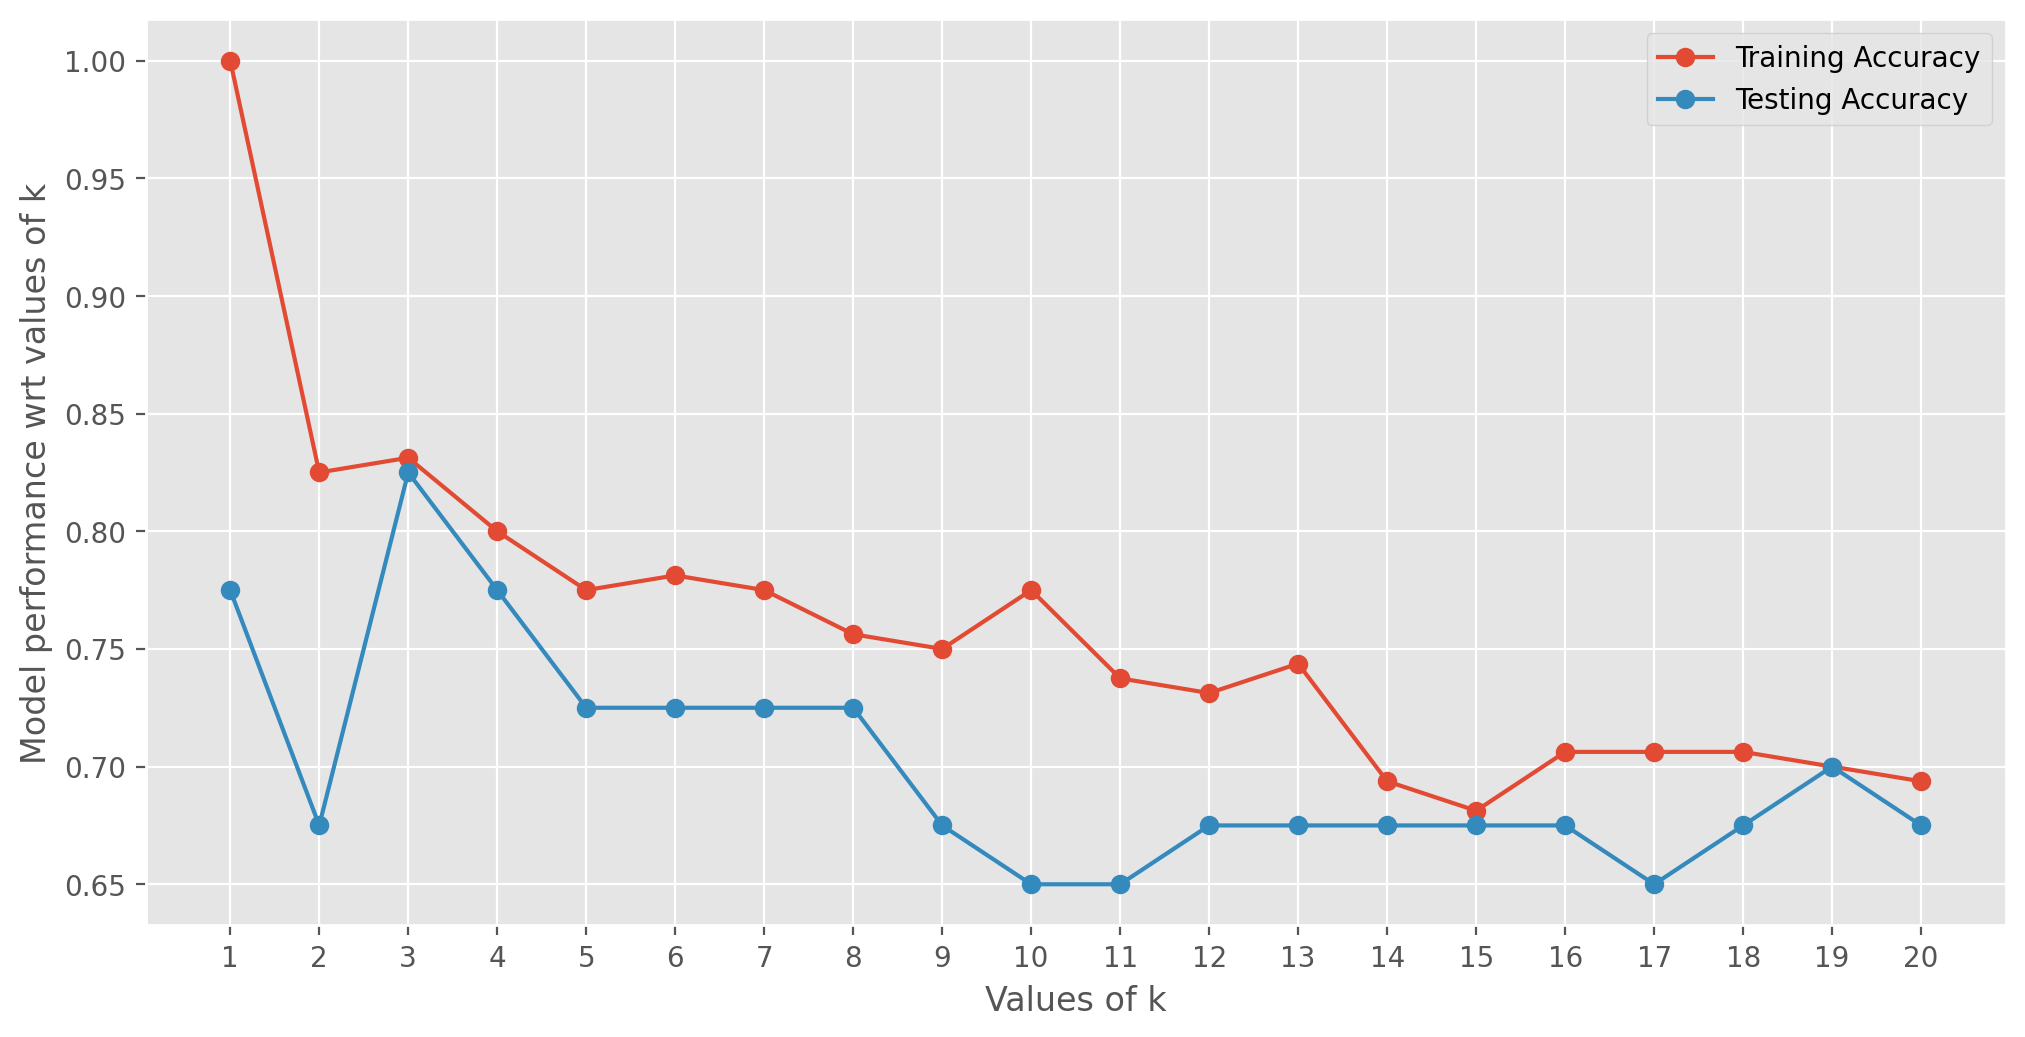

In [68]:
k = range(1,21)

plt.figure(figsize = (12,6), dpi = 200)
plt.plot(k, acc_train, '-o', label = 'Training Accuracy')
plt.plot(k, acc_test,  '-o', label = 'Testing Accuracy')

plt.xticks(k)
plt.xlabel('Values of k')
plt.ylabel('Model performance wrt values of k')
plt.legend()

In [69]:
# Best model (With value of k (n_neighbors) = 3)
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

print('Training Set Score : ', classifier.score(x_train, y_train))
print('Testing Set Score  : ', classifier.score(x_test, y_test))

Training Set Score :  0.83125
Testing Set Score  :  0.825


In [73]:
print(x_test[:5])
classifier.predict(x_test[0:5])

     Age  Sex  BP  Cholesterol  Na_to_K
119   61    1   2            1   25.475
77    26    1   2            0   19.161
148   61    1   0            0    7.340
149   22    0   0            1    8.151
154   37    0   0            0   16.724


array(['drugY', 'drugY', 'drugX', 'drugA', 'drugY'], dtype=object)

In [72]:
y_test[:5]

,Drug
119,drugY
77,drugY
148,drugX
149,drugC
154,drugY


<AxesSubplot:xlabel='BP', ylabel='count'>

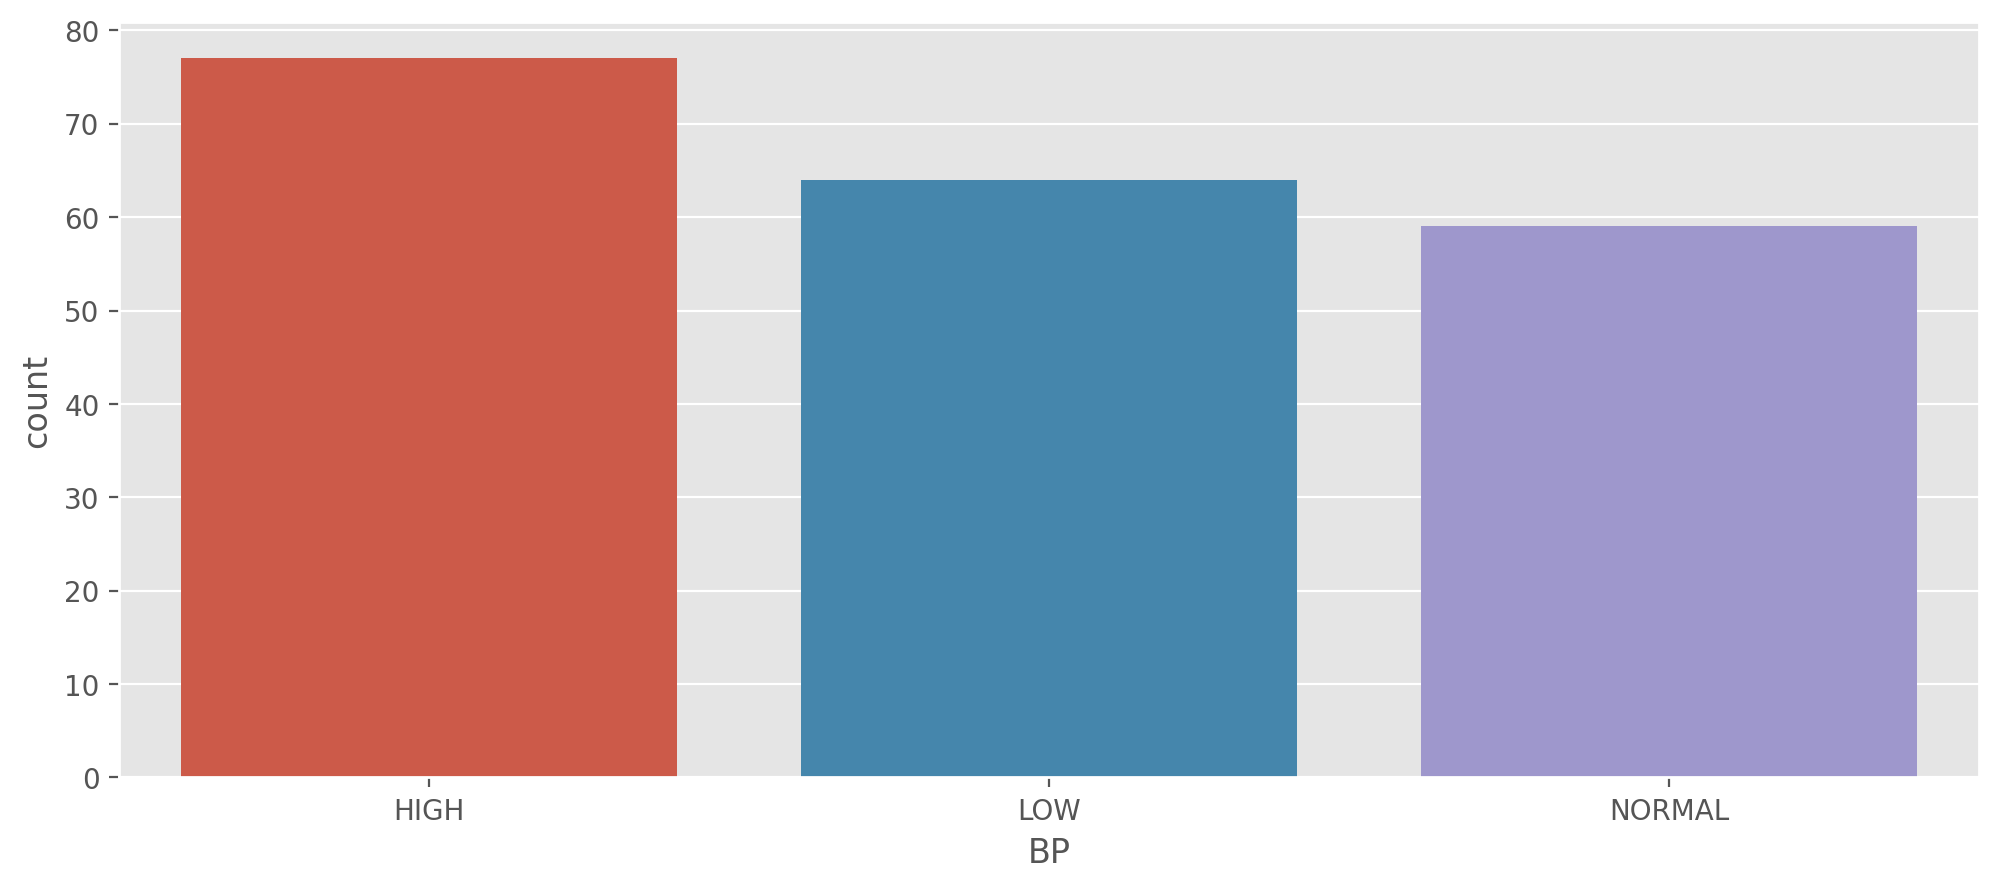

In [74]:
plt.figure(figsize = (12,5), dpi =200)
sns.countplot('BP', data = data)

In [76]:
data.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

<AxesSubplot:xlabel='Cholesterol', ylabel='count'>

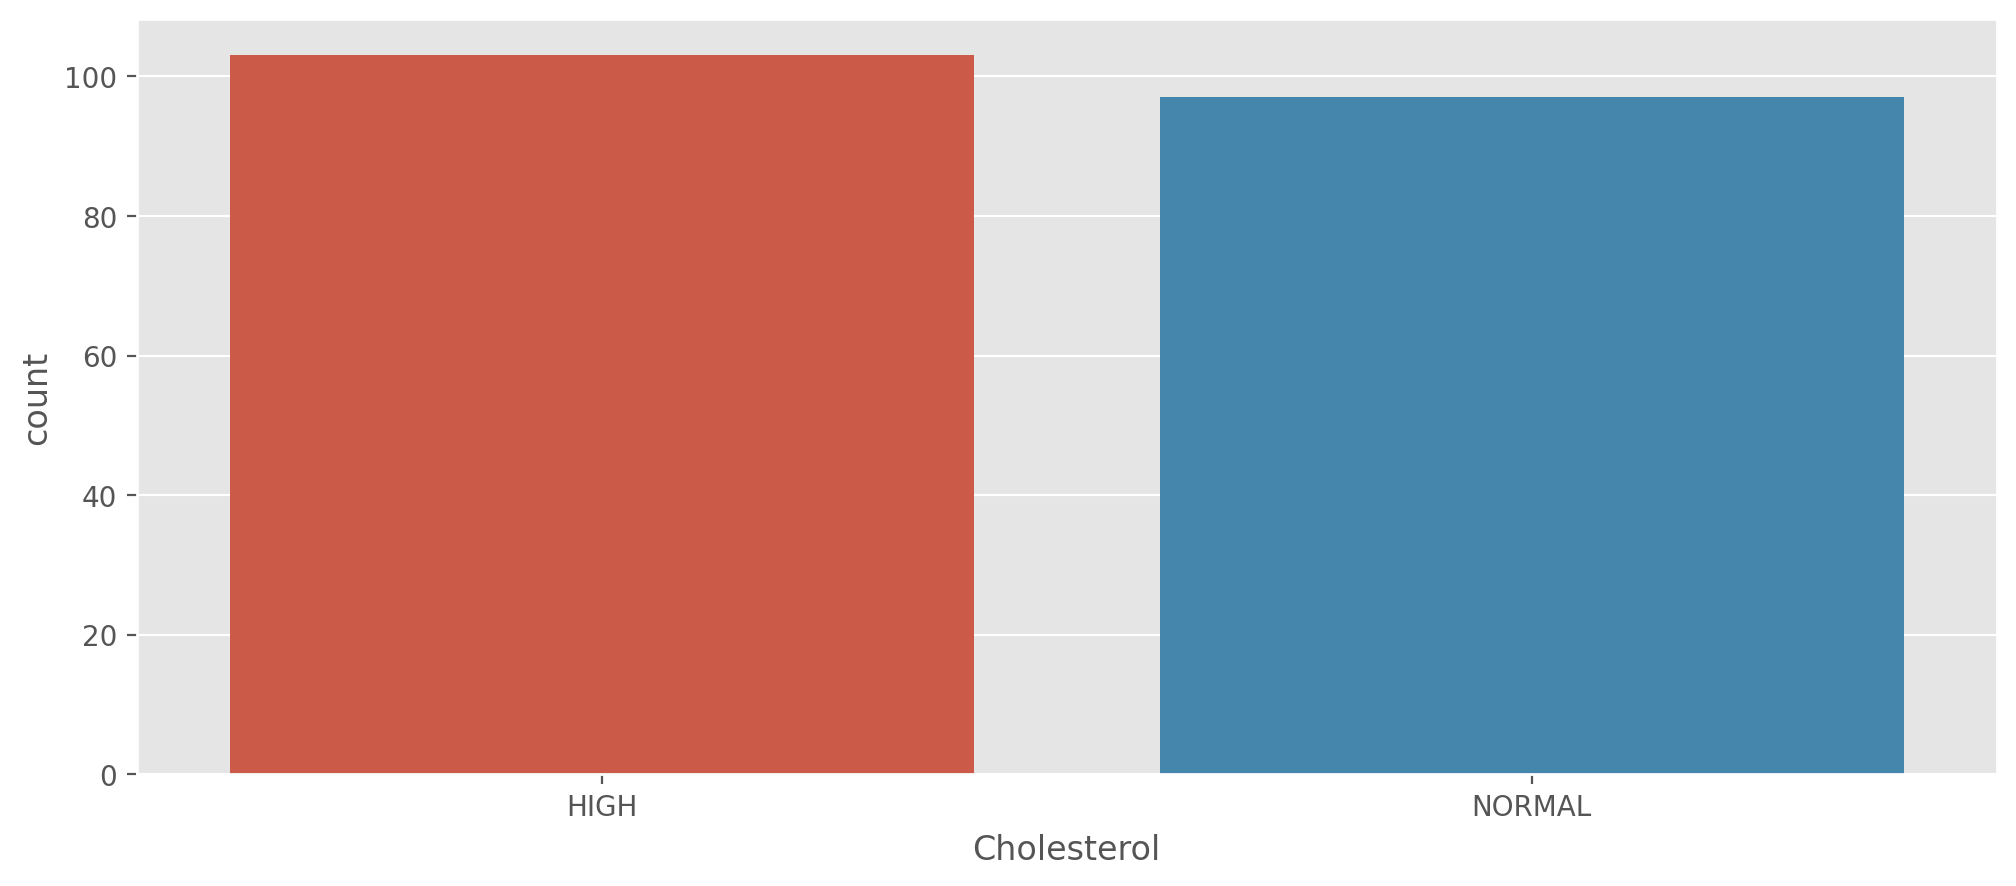

In [77]:
plt.figure(figsize = (12,5), dpi =200)
sns.countplot('Cholesterol', data = data)

In [78]:
data.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

<AxesSubplot:xlabel='Cholesterol', ylabel='count'>

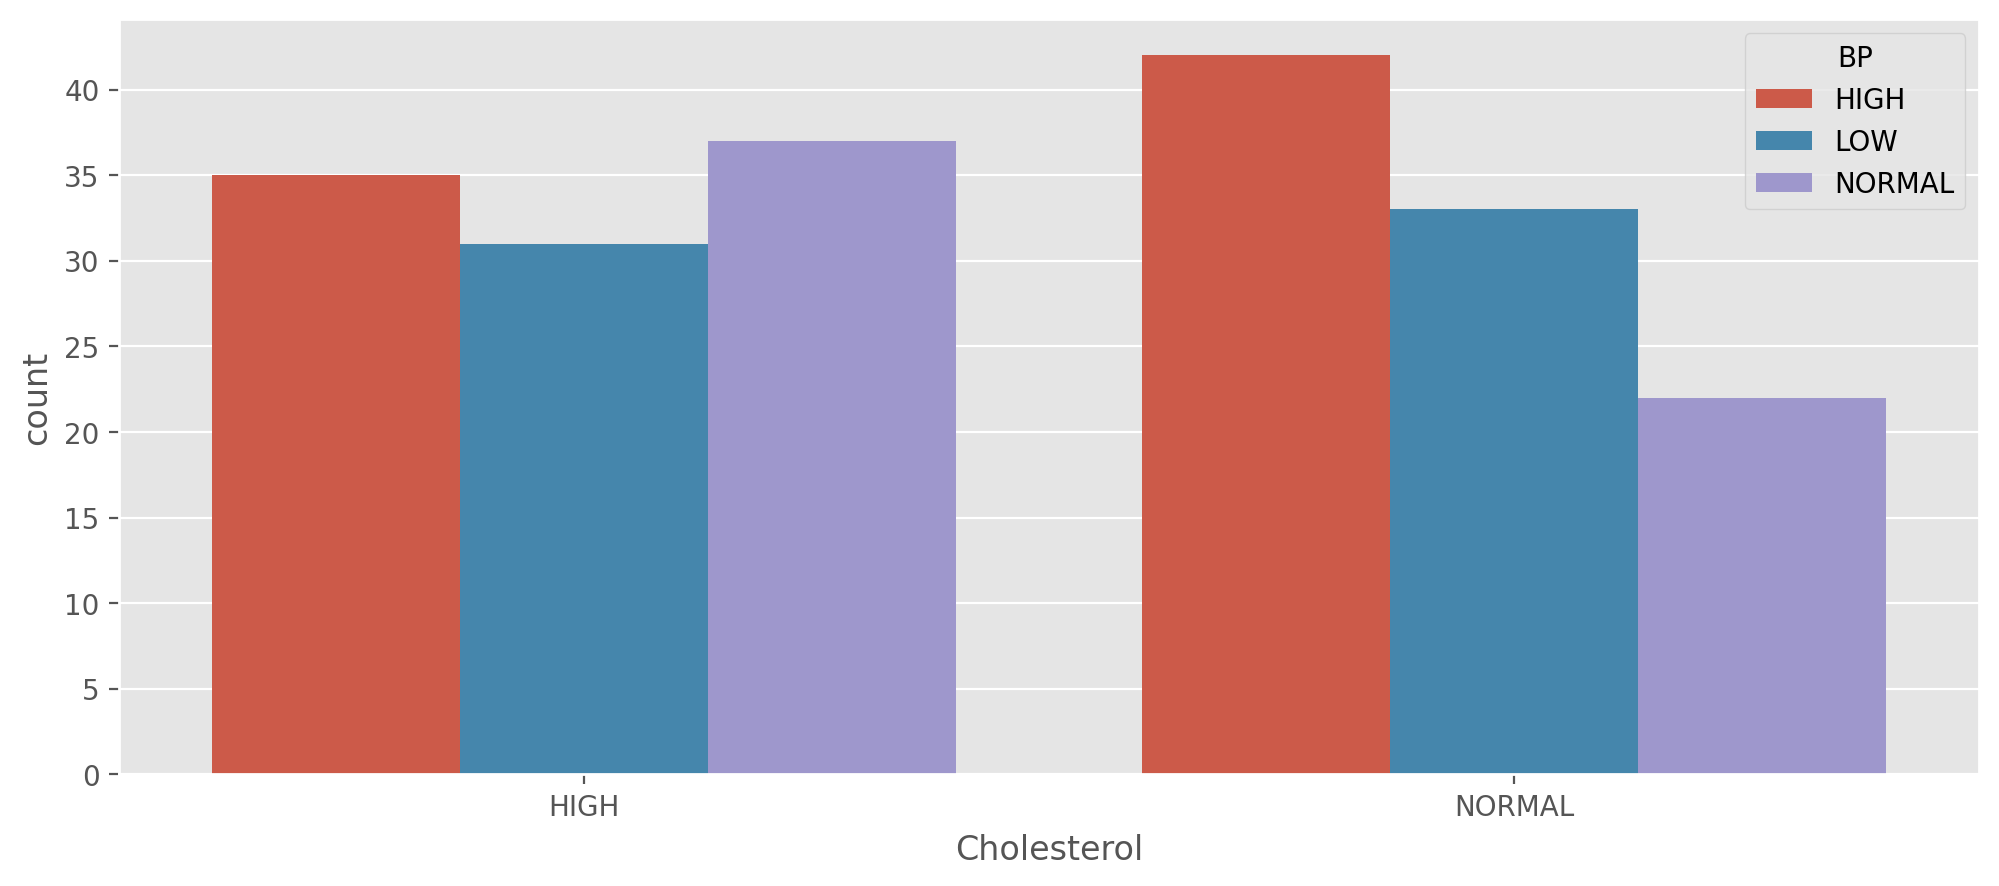

In [79]:
plt.figure(figsize = (12,5), dpi =200)
sns.countplot('Cholesterol', hue = 'BP', data = data)

In [81]:
high_Chol_patients = data[data.Cholesterol == 'HIGH']
high_Chol_patients

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
193,72,M,LOW,HIGH,6.769,drugC
194,46,F,HIGH,HIGH,34.686,drugY
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC


In [82]:
high_Chol_patients.BP.value_counts()

NORMAL    37
HIGH      35
LOW       31
Name: BP, dtype: int64

<AxesSubplot:xlabel='BP', ylabel='count'>

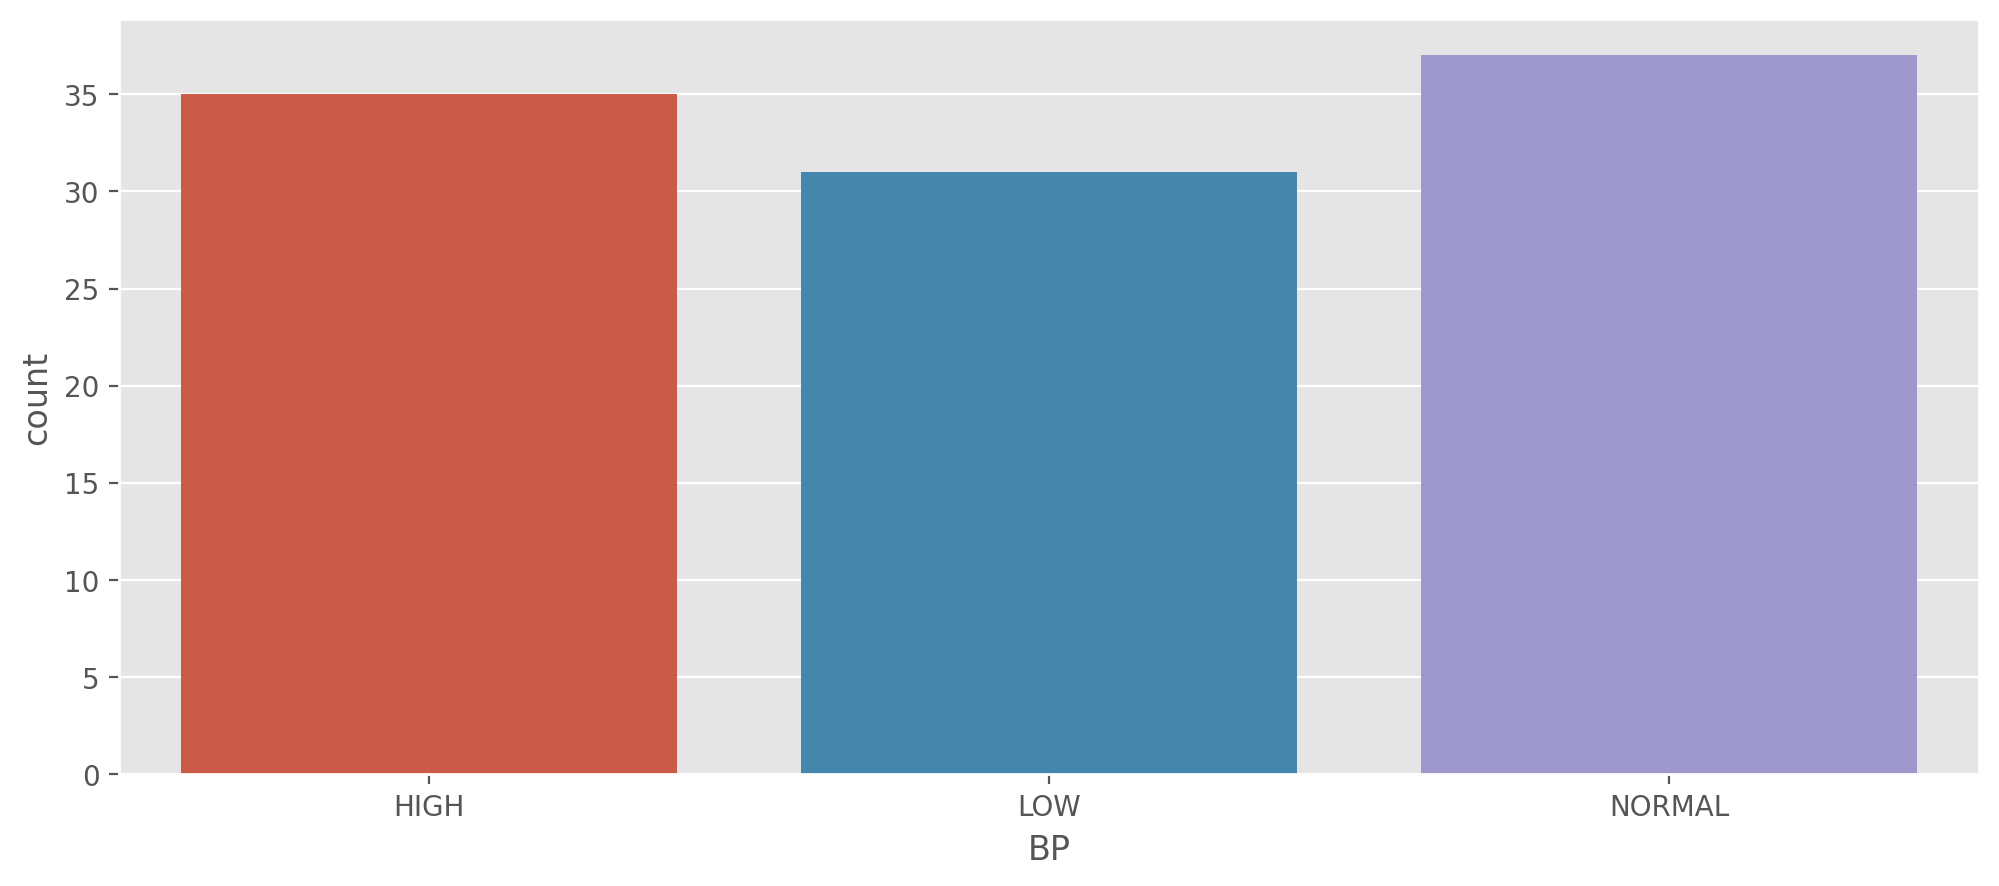

In [83]:
plt.figure(figsize = (12,5), dpi =200)
sns.countplot('BP', data = high_Chol_patients)

In [84]:
data.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [86]:
data.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

<AxesSubplot:ylabel='Na_to_K'>

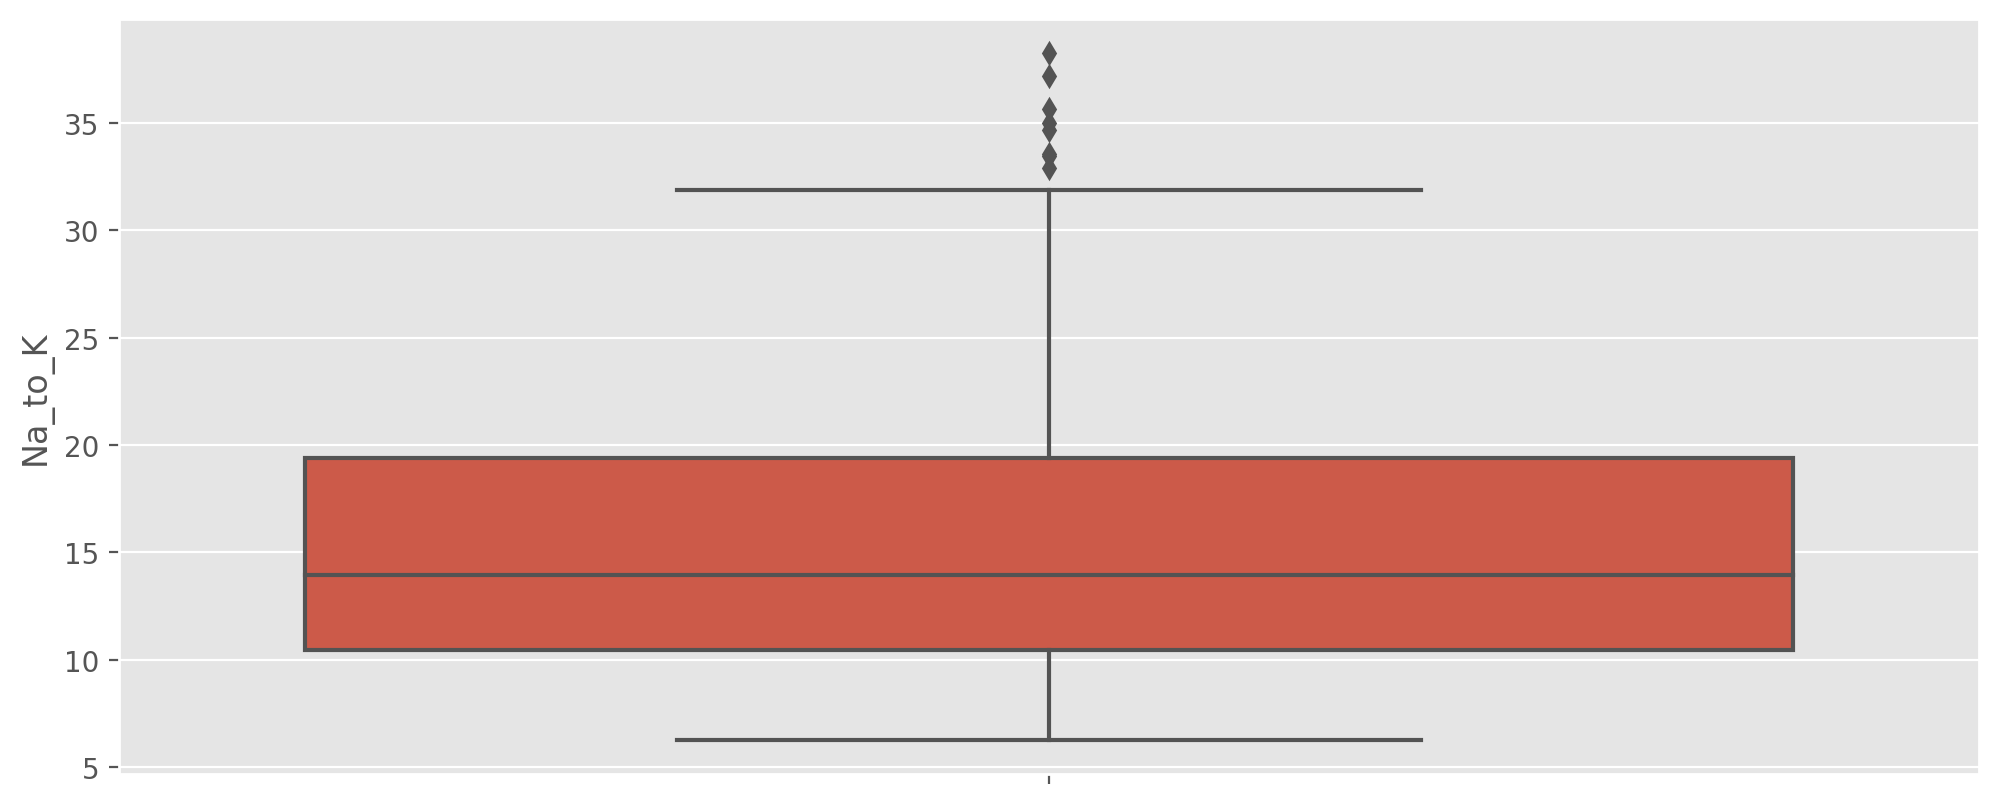

In [87]:
plt.figure(figsize = (12,5), dpi =200)
sns.boxplot(y = 'Na_to_K', data = data)

In [92]:
len(data[data.Na_to_K > 15])

91